# Equilibrium points

## Equilibrium points in 1D

Model van tumor:
$$X' = X\left(k-\alpha ln\left(\frac{X}{X(0)}\right)\right)$$
Met X de massa van de tumor en met r en α positieve constanten. De evenwichtspunten en hun stabiliteiten kunnen analytisch gevonden worden door kijken waar ze nul is, dit is in X = 0 en
$$X = X(0) e^{\frac{k}{\alpha}}$$

We kunnen de stabiliteiten van de punten analytisch vinden door de vergelijking af te leiden en kijken of de afgeleide negatief of positief is, de afgeleide wordt gegeven door:

$$\frac{dX'}{dX} = k - \alpha ln\left(\frac{X}{X(0)}\right) - \alpha$$

in X = 0 gaat ln(x) naar negatief oneindig, door de -α voorfactor is dit dus een onstabiel punt. In $$X = X(0)e^{\frac{k}{\alpha}}$$ echter is $$\frac{dX'}{dX} = -\alpha$$ dit is dus een stabiel punt

Nu stellen we een lineaire stabiliteitsanalyse op:

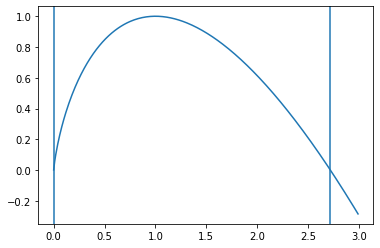

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

k = 1
alpha = 1
X_0 = 1 

def X_prime(X):
    return X*(k-alpha*np.log(X/X_0))

X_1 = np.arange(0.0001,3,0.01)
plt.plot(X_1, X_prime(X_1), label = 'linear stability analysis')
plt.axvline(np.e)
plt.axvline(0)
plt.show()

Nu de volgende systemen:
$$X' = -X^3$$
$$X' = X^3$$
$$X' = X^2$$
Deze hebben allemaal een equilibrium in X = 0 met de eerste stabiel en de laatste 2 instabiel:
-lmao das ni per se waar haha tis al 0, raar genoeg wel semi waar xs

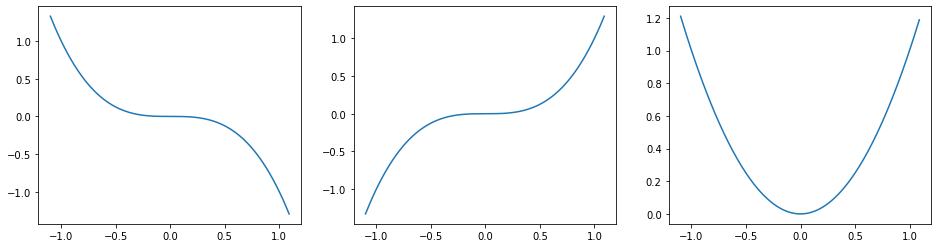

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(16,4))

def X_prime_min_3(X):
    return -X**3
def X_prime_3(X):
    return X**3
def X_prime_2(X):
    return X**2

X = np.arange(-1.1,1.1,0.01)
ax1.plot(X_1, X_prime_min_3(X), label = 'linear stability analysis')
ax2.plot(X_1, X_prime_3(X), label = 'linear stability analysis')
ax3.plot(X_1, X_prime_2(X), label = 'linear stability analysis')
plt.show()

## Equilibria in 2D

### Eigenvalues and eigenvectors

We berekenen nu de eigenwaarden en eigenvectoren van het volgende systeem:
$$X' = \frac{9}{7}X - \frac{4}{7}Y$$
$$Y' = \frac{8}{7}X - \frac{9}{7}Y$$
d.i
$$
\begin{bmatrix}
           X'\\
           Y'\\
         \end{bmatrix} = 
\left[
  \begin{array}{cc}
    \frac{9}{7} & -\frac{4}{7}\\
    \frac{8}{7} & - \frac{9}{7}\\
  \end{array}
\right]
\begin{bmatrix}
           X\\
           Y\\
         \end{bmatrix}
$$
De eigenwaarden worden gevonden door:
$$det(M-\lambda \mathbb{1}) = \lambda^2 + 1 = 0 \implies \lambda = \pm 1$$
De eigenvectoren worden vervolgens gevonden door op
$$(M - \lambda \mathbb{1})\vec{x} = \vec{0}$$
Gaussische eliminatie toe te passen, d.i
$$(M - \lambda \mathbb{1}:\vec{0})$$
In rij-echelonvorm, dit geeft als eigenvectoren (2,1) en (1,4).

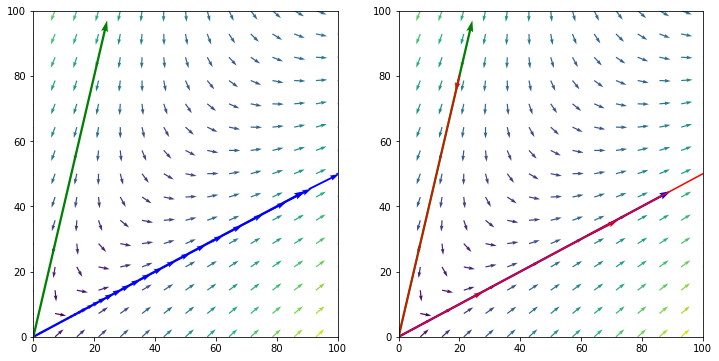

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
M = np.array([[9/7,-4/7],[8/7,-9/7]])
eigenwaarden,eigenvectoren = la.eig(M)

X = eigenvectoren[0] #X-waarden
Y = eigenvectoren[1] #Y-waarden
oorsprong = [0,0]

def verandering(X,Y):
    #u -> X'
    #v -> Y'
    u = 9/7*X - 4/7*Y
    v = 8/7*X- 9/7*Y
    return [u,v]

def euler_1(stapgrootte,periode):
    
    #initiële condities
    X = 2
    Y = 1
    
    x = []
    y = []
    for i in range(0,periode):
        x.append(X)
        y.append(Y)
        X += stapgrootte*verandering(x[-1],y[-1])[0]
        Y += stapgrootte*verandering(x[-1],y[-1])[1]
    return x,y

def euler_2(stapgrootte,periode):
    
    #initiële condities
    X = 20
    Y = 80
    
    x = []
    y = []
    for i in range(0,periode):
        x.append(X)
        y.append(Y)
        X += stapgrootte*verandering(x[-1],y[-1])[0]
        Y += stapgrootte*verandering(x[-1],y[-1])[1]
    return x,y

A,B = np.meshgrid(np.linspace(0,100,15),np.linspace(0,100,15))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))

u = 9/7*A - 4/7*B
v = 8/7*A- 9/7*B
O = np.sqrt(u**2 + v**2)
O[ O == 0] = 1 #vermijden dat er door 0 gedeeld wordt
u /= O
v /= O
x_1,y_1 = euler_1(0.1,100)
x_2,y_2 = euler_2(0.1,1000)


#Hier komt de code om de pijlen te genereren die tonen hoe het traject gaat:

def pijler1(X,Y):
    x = []
    y = []
    t = []
    for i in range(100):
        x.append(X[i])
        y.append(Y[i])
        t.append(i)
    return x,y,t

def pijler2(X,Y):
    x = []
    y = []
    t = []
    for i in range(100):
        x.append(X[i*10])
        y.append(Y[i*10])
        t.append(i*10)
    return x,y,t
            
x_1_pijlen,y_1_pijlen,tijd1 = pijler1(x_1,y_1)
tijd1 = tijd1[:-1]
ax1.quiver(x_1_pijlen[:-1],y_1_pijlen[:-1],x_1_pijlen[1:],y_1_pijlen[1:],scale=1000,linewidths=tijd1,color='b')

x_2_pijlen,y_2_pijlen,tijd2 = pijler2(x_2,y_2)
tijd2 = tijd2[:-1]
richtingx = np.array(x_2_pijlen[1:]) - np.array(x_2_pijlen[:-1])
richtingy = np.array(y_2_pijlen[1:]) - np.array(y_2_pijlen[:-1])
ax2.quiver(x_2_pijlen[:-1],y_2_pijlen[:-1],richtingx,richtingy,scale=1000,linewidths=tijd2,color='r')

ax1.quiver(A,B,u,v,O)
ax2.quiver(A,B,u,v,O)
ax1.quiver(oorsprong,oorsprong,X,Y,scale=0.01,scale_units='xy',angles='xy',color=['b','g'])
ax2.quiver(oorsprong,oorsprong,X,Y,scale=0.01,scale_units='xy',angles='xy',color=['b','g'])

#ax1.plot(x_1,y_1)
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)

ax2.plot(x_2,y_2,color='r')
ax2.set_xlim(0,100)
ax2.set_ylim(0,100)
plt.show()

Nu de stabiliteit van het volgende systeem vinden gebaseerd op de eigenwaarden en eigenvectoren:
$$X' = V$$
$$V' = -X-(V^3-V)$$
Dit is de Rayleigh Oscillator van p. 389, we berekenen de eigenvectoren met de computer en met de hand en gaan onze resultaten na met simulaties:
Dit heeft 1 stabiel punt in (0,0) de stabiliteit van dat punt kunnen we benaderend berekenen met de Jacobiaan:
$$
\left[
  \begin{array}{cc}
    \frac{\partial X'}{\partial X} & \frac{\partial X'}{\partial V}\\
    \frac{\partial V'}{\partial X} & \frac{\partial V'}{\partial V}\\
  \end{array}
\right]
=
\left[
  \begin{array}{cc}
    0 & 1\\
    -1 & -3V^2+1\\
  \end{array}
\right]
\stackrel{(0,0)}{=}
\left[
  \begin{array}{cc}
    0 & 1\\
    -1 & 1\\
  \end{array}
\right]
$$

$$det\left(\left[
  \begin{array}{cc}
    0 & 1\\
    -1 & 1\\
  \end{array}
\right]-\lambda \mathbb{1}\right) = \lambda^2 -\lambda + 1 = 0 \implies \lambda = \frac{1}{2} \pm \frac{\sqrt{3}}{2}i$$
Dit is dus een onstabiele spiraal, de eigenvectoren worden zoals voordien gevonden en zijn
$$\vec{v_1}=\begin{pmatrix} \frac{1}{2}+\frac{\sqrt{3}}{2}i \\ 1\end{pmatrix} \text{ en } \vec{v_2}=\begin{pmatrix} \frac{1}{2}-\frac{\sqrt{3}}{2}i \\ 1\end{pmatrix}$$

In [5]:
import numpy as np
import scipy.linalg as la
M = np.array([[0,1],[-1,1]])
eigenwaarden,eigenvectoren = la.eig(M)
print(eigenvectoren)

[[0.70710678+0.j         0.70710678-0.j        ]
 [0.35355339+0.61237244j 0.35355339-0.61237244j]]


Dit zijn essentieel dezelfde waarden als de zelf-uitgerekende eigenvectoren met het enige verschil dat x1=1 wordt gesteld.

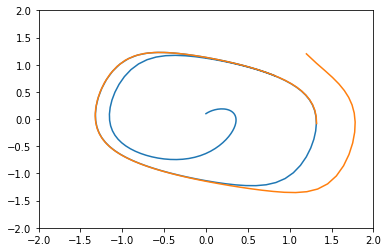

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verandering(X,V):
    #u -> X'
    #v -> Y'
    u = V
    v = -X - (V**3 - V)
    return [u,v]

def euler(stapgrootte,periode,initx,inity):
    
    #initiële condities
    X = initx
    V = inity
    
    x = []
    y = []
    for i in range(0,periode):
        x.append(X)
        y.append(V)
        X += stapgrootte*verandering(x[-1],y[-1])[0]
        V += stapgrootte*verandering(x[-1],y[-1])[1]
    return x,y

x1,y1 = euler(0.1,150,0,0.1)
x2,y2 = euler(0.1,80,1.2,1.2)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

Van alle punten buiten (0,0) neigt het systeem naar de cyclus die we een (p.179) Limietcykel noemen.

### Nullclines

Laten we nu de Collins genetische schakelaar bekijken (p.154):
$$R' = \frac{k}{1+C^4}-R$$

$$C' = \frac{k}{1+R^4}-C$$
Met k = 5.
De Nullclines worden gegeven door 
$$R = \frac{5}{1+C^4}$$
$$C = \frac{5}{1+R^4}$$

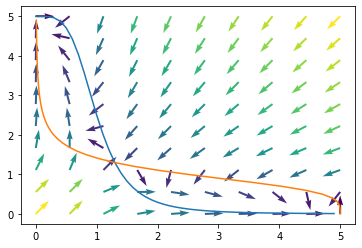

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

R = np.arange(0,5,0.1)
C = np.arange(0,5,0.1)
A,B = np.meshgrid(np.linspace(0,5,10),np.linspace(0,5,10))
u = 5/(1+B**4) - A
v = 5/(1+A**4) - B
O = np.sqrt(u**2 + v**2)
O[ O == 0] = 1 #vermijden dat er door 0 gedeeld wordt
u /= O
v /= O
plt.quiver(A,B,u,v,O)

nullR = 5/(1+C**4)
nullC = 5/(1+R**4)

plt.plot(R,nullC)
plt.plot(nullR,C)
plt.show()